In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['Species']= encoder.fit_transform(df['Species'])

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [9]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

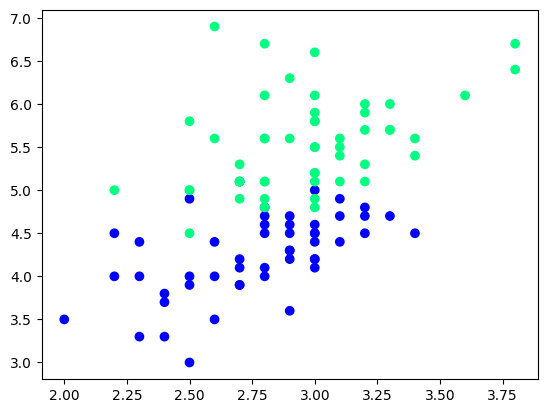

In [11]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species'], cmap='winter')

In [12]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
86,3.1,4.7,1
87,2.3,4.4,1
106,2.5,4.5,2
98,2.5,3.0,1
73,2.8,4.7,1
96,2.9,4.2,1
67,2.7,4.1,1
104,3.0,5.8,2
82,2.7,3.9,1
68,2.2,4.5,1


In [14]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [15]:
df_train

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
117,3.8,6.7,2
55,2.8,4.5,1
56,3.3,4.7,1
134,2.6,5.6,2
148,3.4,5.4,2
131,3.8,6.4,2
142,2.7,5.1,2
71,2.8,4.0,1
57,2.4,3.3,1


In [16]:
df_val

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
97,2.9,4.3,1
126,2.8,4.8,2
130,2.8,6.1,2
87,2.3,4.4,1


In [17]:
df_test

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
121,2.8,4.9,2
122,2.8,6.7,2
135,3.0,6.1,2
75,3.0,4.4,1


In [18]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [19]:
y_test

array([2, 1, 2, 2, 1])

# Case 1 - Bagging

In [21]:
# Data for Tree 1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
131,3.8,6.4,2
71,2.8,4.0,1
71,2.8,4.0,1
55,2.8,4.5,1
56,3.3,4.7,1
134,2.6,5.6,2
142,2.7,5.1,2
71,2.8,4.0,1


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


In [23]:
dt_bag1 = DecisionTreeClassifier()

In [29]:
dt_bag1.fit(X,y)

DecisionTreeClassifier()

In [33]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

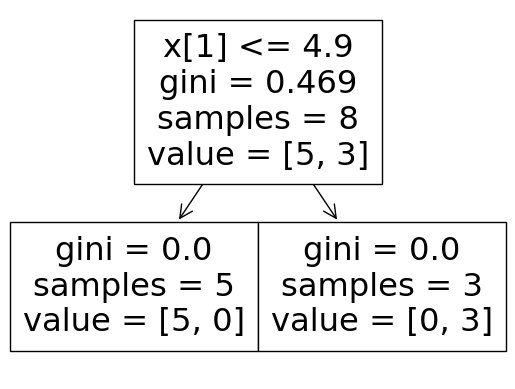

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


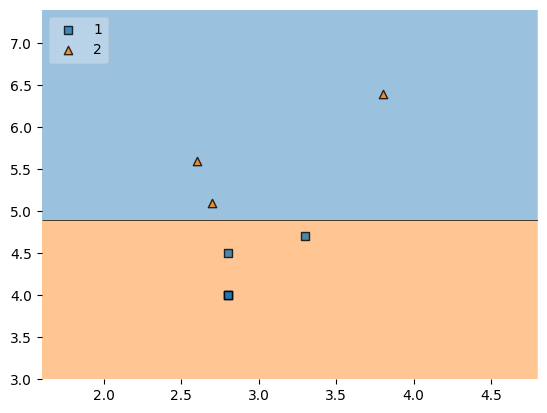

In [34]:
evaluate(dt_bag1, X, y)

In [35]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
131,3.8,6.4,2
55,2.8,4.5,1
117,3.8,6.7,2
56,3.3,4.7,1
131,3.8,6.4,2
131,3.8,6.4,2
55,2.8,4.5,1


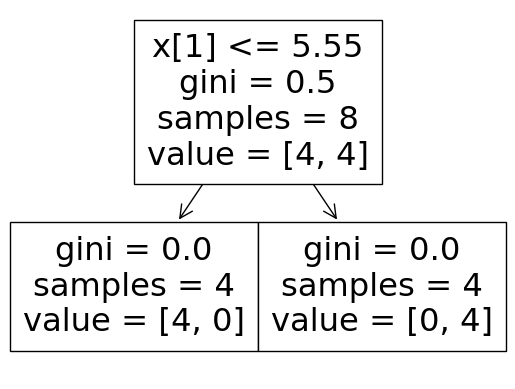

0.8


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


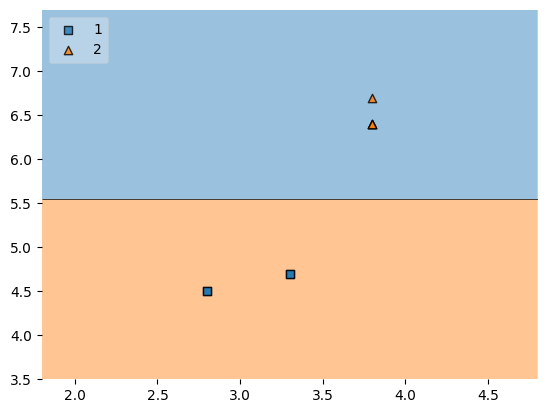

In [36]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [37]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
117,3.8,6.7,2
131,3.8,6.4,2
134,2.6,5.6,2
117,3.8,6.7,2
142,2.7,5.1,2
74,2.9,4.3,1
55,2.8,4.5,1


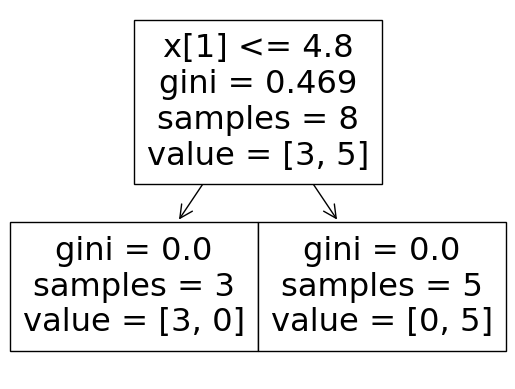

1.0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


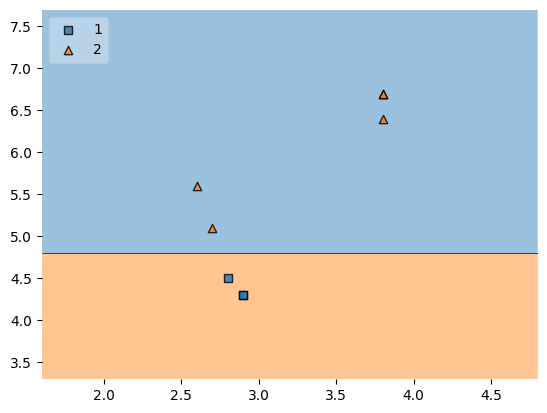

In [38]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [39]:
df_test

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
121,2.8,4.9,2
122,2.8,6.7,2
135,3.0,6.1,2
75,3.0,4.4,1


In [40]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [41]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
117,3.8,6.7,2
55,2.8,4.5,1
56,3.3,4.7,1
134,2.6,5.6,2
148,3.4,5.4,2
131,3.8,6.4,2
142,2.7,5.1,2
71,2.8,4.0,1
57,2.4,3.3,1


In [42]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
55,2.8,4.5,1
117,3.8,6.7,2
57,2.4,3.3,1
148,3.4,5.4,2
56,3.3,4.7,1
142,2.7,5.1,2
131,3.8,6.4,2
134,2.6,5.6,2


# Random Subspaces

In [43]:
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
df1 = df1.sample(10)

In [44]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica
134,135,6.1,2.6,5.6,1.4,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa


In [45]:
df1.sample(2, replace=True, axis=1)

,SepalLengthCm,Id
40,5.0,41
74,6.4,75
126,6.2,127
134,6.1,135
13,4.3,14
59,5.2,60
54,6.5,55
98,5.1,99
69,5.6,70
22,4.6,23


# Random Patches

In [46]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica
134,135,6.1,2.6,5.6,1.4,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa


In [47]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalWidthCm,Id
54,2.8,55
22,3.6,23
98,2.5,99
134,2.6,135
59,2.7,60
22,3.6,23
98,2.5,99
54,2.8,55
